In [1]:
#import neccessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC


In [3]:
#2. Load dataset

df = pd.read_csv("Iris.csv")

In [5]:
#3. Print no. of rows and columns

print("number of rows and columns",df.shape)

number of rows and columns (150, 6)


In [6]:
# 4. Print dataframe into data types

print("\nData types: ",df.dtypes)


Data types:  Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object


In [7]:
# 5. Print attribute names

print("Attributes names: ",df.columns.tolist())

Attributes names:  ['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']


In [8]:
## 6. Print top 5 rows

print("Top five rows are: ",df.head())

Top five rows are:     Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [9]:
# 7. Print bottom 5 rows

print("Bottom Five rows: ",df.tail())


Bottom Five rows:        Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
145  Iris-virginica  
146  Iris-virginica  
147  Iris-virginica  
148  Iris-virginica  
149  Iris-virginica  


In [22]:
# 8. Print unique class labels

print("\nUnique class: ",df['Species'].unique())


Unique class:  ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [23]:
print(df.columns)

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [28]:
# 9. Print number of examples per class and missing values

print("\nClass Distribution:\n",df['Species'].value_counts())
print("\nMissing values:\n", df.isnull().sum())

# 10. Drop the ID column

df.drop('Id', axis=1, inplace=True, errors='ignore')

#11. Print summary statistics

print("\nSummary statistics: \n",df.describe())



Class Distribution:
 Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

Missing values:
 SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Summary statistics: 
        SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000


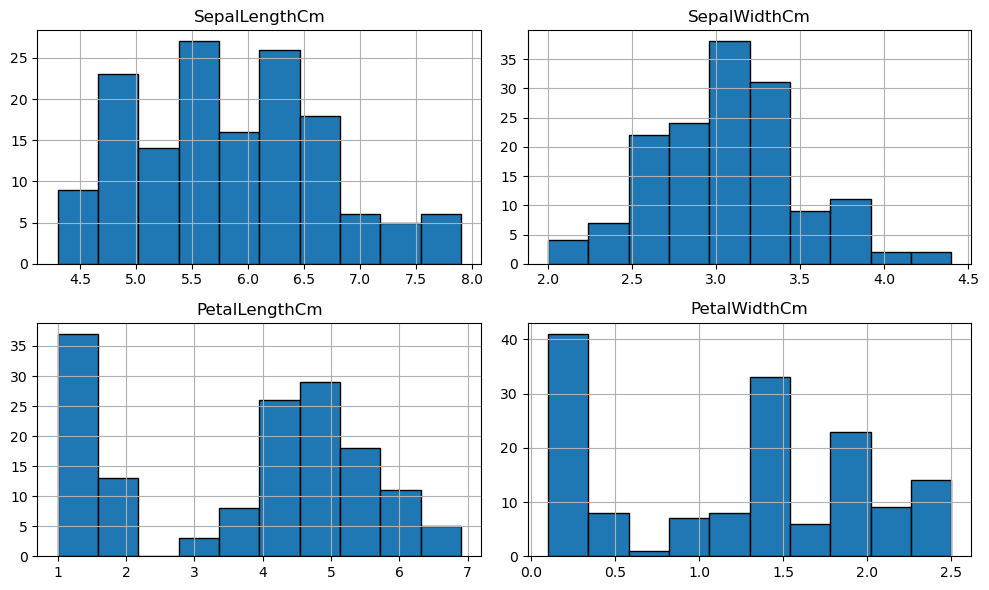

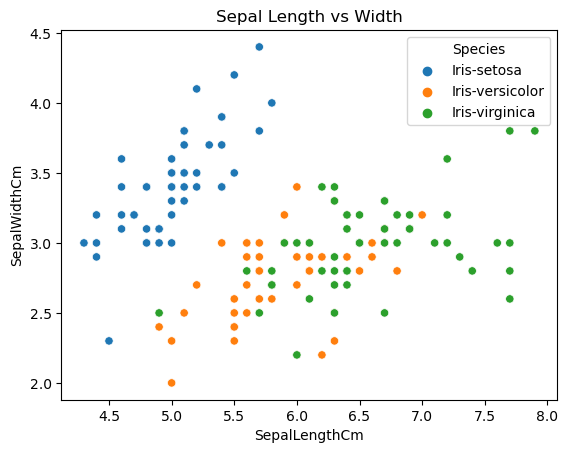

In [29]:
# 12. Plot histogram of all input features

df.hist(figsize=(10,6), edgecolor = 'black')
plt.tight_layout()
plt.show()


# 13. Scatter plot of sepal length vs sepal width

sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue='Species', data=df)
plt.title('Sepal Length vs Width')
plt.show()

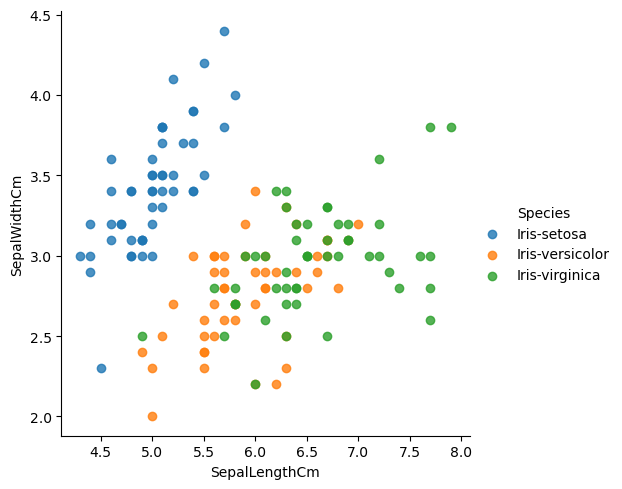

In [25]:
# 14. Scatter plot using seaborn’s facetgrid

sns.lmplot(x='SepalLengthCm', y='SepalWidthCm', data=df, hue='Species', fit_reg=False)
plt.show()

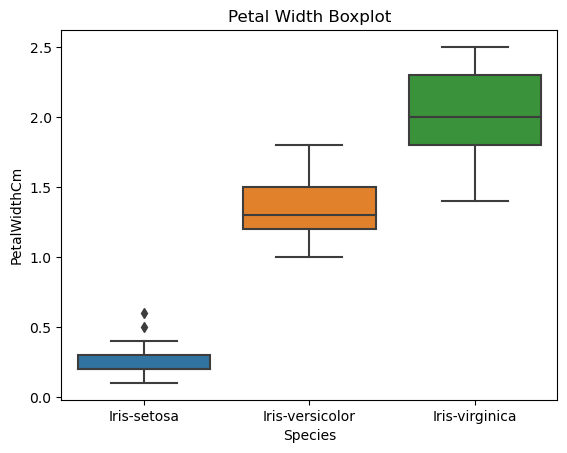

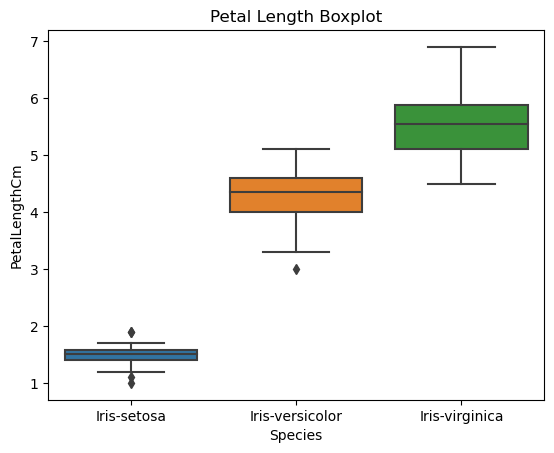

In [30]:
# 15–16. Boxplots

sns.boxplot(x='Species', y='PetalWidthCm', data=df)
plt.title("Petal Width Boxplot")
plt.show()

sns.boxplot(x='Species', y='PetalLengthCm', data=df)
plt.title("Petal Length Boxplot")
plt.show()

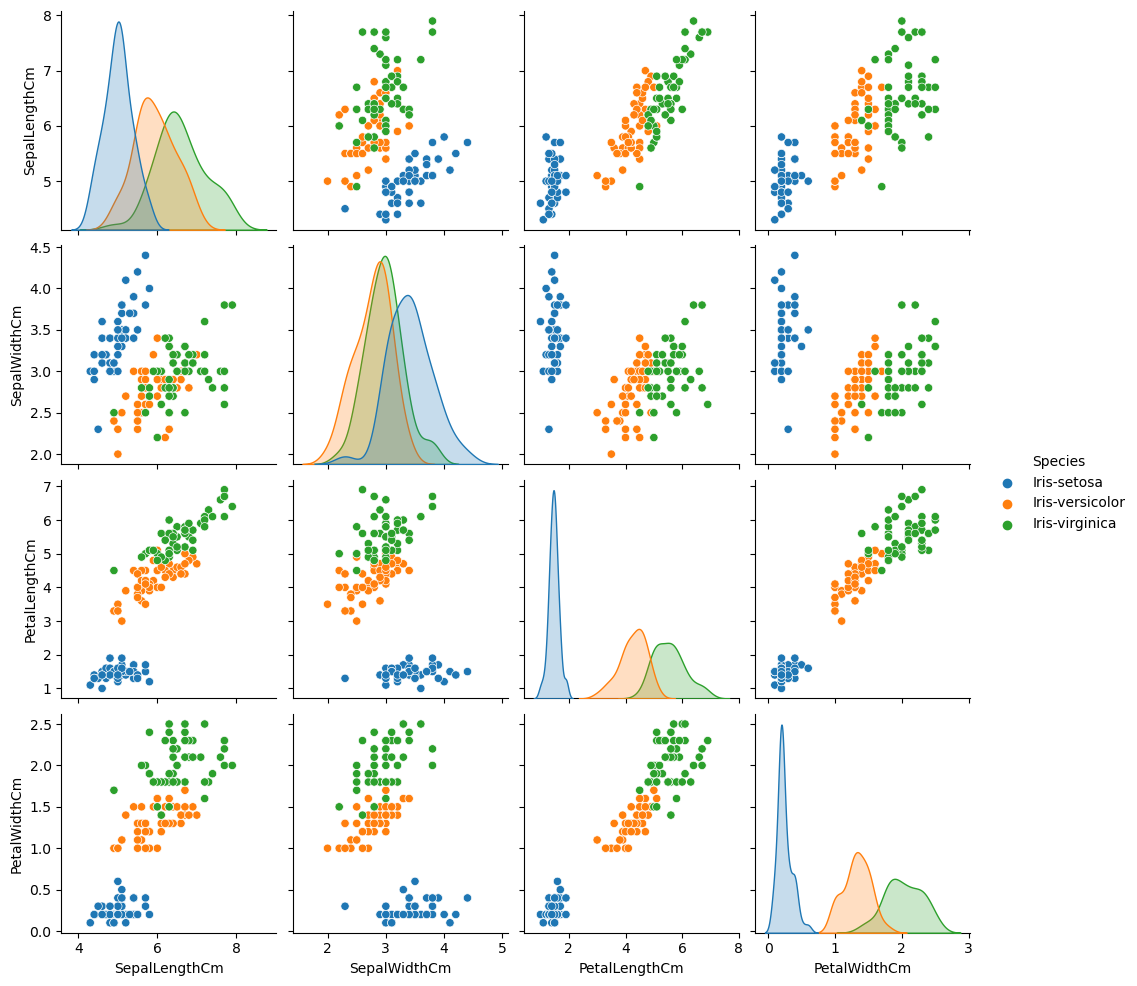

In [31]:
# 17. Pairplot of all features colored by species

sns.pairplot(df, hue='Species')
plt.show()

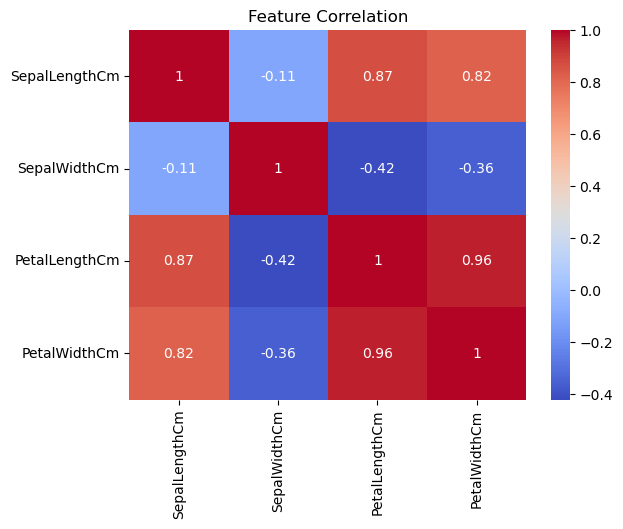

In [33]:
# 18. Correlation among features

sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

In [43]:
# 19. Prepare x and y

x = df.drop('Species', axis=1)
y = df['Species']

In [46]:
# Feature and target selection
X = df.drop('Species', axis=1)
y = df['Species']

#20. Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [47]:
# 21. Check SVC documentation (done manually via sklearn docs)

# 22–23. Instantiate SVC with C=1
from sklearn.svm import SVC
model = SVC(C=1)

In [48]:
# 24. Fit the model

model.fit(X_train, y_train)

SVC(C=1)

In [49]:
# 25. Predict

y_pred = model.predict(X_test)

In [50]:
# 26. Evaluate with confusion matrix

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [51]:
#27. Print other metrics

print("\nClassifications Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score", accuracy_score(y_test, y_pred))


Classifications Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

Accuracy Score 1.0


In [54]:
# 28. Print classification report already done above

# 29. K-fold validation

from sklearn.model_selection import cross_val_score
print("\nk-Fold CV Accuracy:", cross_val_score(SVC(C=1), X, y, cv=5).mean())


k-Fold CV Accuracy: 0.9666666666666666


In [57]:
# 30–34. Grid Search CV

from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000]}
grid = GridSearchCV(SVC(), param_grid, cv=5)
grid.fit(X, y)

GridSearchCV(cv=5, estimator=SVC(), param_grid={'C': [0.1, 1, 10, 100, 1000]})

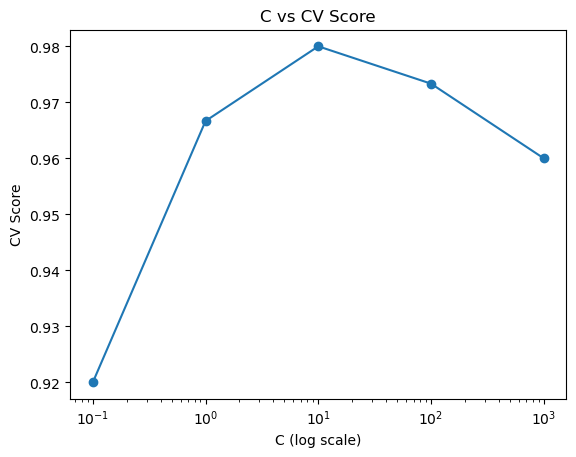

In [59]:
# 35. Plot of C vs scores

results = pd.DataFrame(grid.cv_results_)
plt.plot(param_grid['C'], results['mean_test_score'], marker='o')
plt.xscale('log')
plt.xlabel('C (log scale)')
plt.ylabel('CV Score')
plt.title('C vs CV Score')
plt.show()

In [60]:
# 36. Best Score and Best C value
print("Best Score:", grid.best_score_)
print("Best Parameters:", grid.best_params_)

Best Score: 0.9800000000000001
Best Parameters: {'C': 10}
